<a href="https://colab.research.google.com/github/bilowizra/190503004_BilalcanGules/blob/master/B%C4%B0LALCAN_G%C3%9CLE%C5%9E_Hausaufgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hausaufgabe
Dies ist die Hausaufgabe zur Veranstaltung Data-Mining.
Hierzu gibt es eine Datei mit Daten, die mit DatenHAVorlage.csv bezeichnet und ebenfalls hier im Google Classroom zu finden ist.
Binden Sie diese Datei in dieses Projekt ein und laden Sie die Daten in ein DataFrame-Objekt.
Bearbeiten Sie die Daten so, wie es in den einzelnen sieben Aufgaben in diesem Jupyter-Notebook steht.
Beantworten Sie die Fragen, die in den Aufgaben stehen, ebenfalls in diesem Jupyter-Notebook.
Bearbeiten Sie die Aufgaben jeweils alleine und geben Sie das fertige und lauffähige Jupyter-Notebook bis zum 12. Januar 2024 im Google Classroom ab.
Viel Erfolg bei der Bearbeitung.
Bei Fragen wenden Sie sich bitte an mich: kai.bruessau@gmail.com mit dem Betreff „Hausaufgabe Data-Mining“


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('drive/MyDrive/data/DatenHAVorlage.csv', delimiter=";")
dataset.info()
dataset.shape

FileNotFoundError: ignored

In [ ]:
dataset.head()

###Aufgabe 1

1.   Identifizieren Sie Ausreißer. Berechnen Sie dazu den Z-Score und löschen Sie alle Datensätze, die Ausreißer enthalten.
2.   Wie gehen Sie mit den fehlenden Werten um?



##Aufgabe 2
Transformieren Sie die Kategorien der Variablen x5 (gelb, blau, rot) mittels Dummy-Encoding in drei Binärvariablen

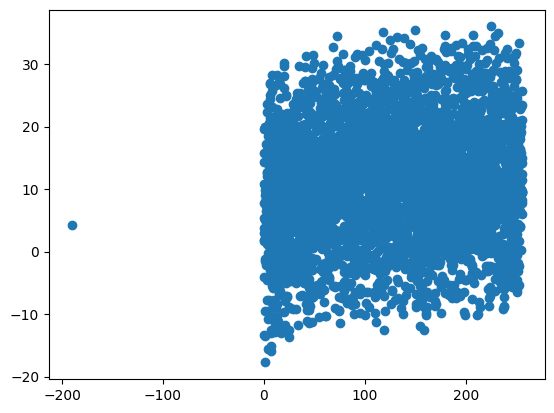

In [ ]:
plt.scatter(dataset['x1'], dataset['y'])

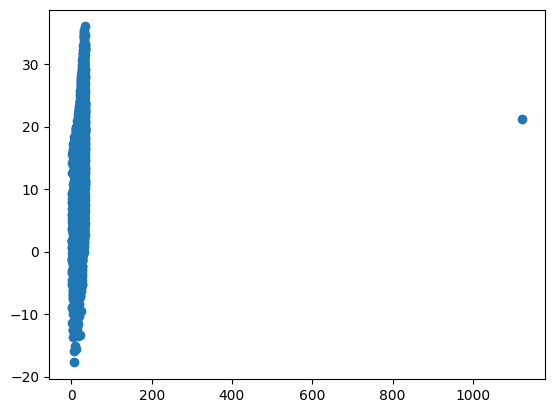

In [ ]:
plt.scatter(dataset['x2'], dataset['y'])

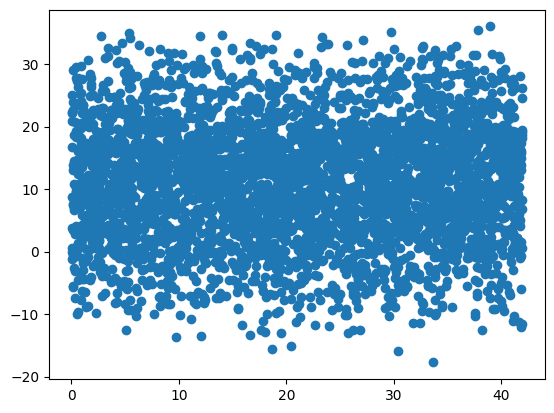

In [ ]:
plt.scatter(dataset['x3'], dataset['y'])

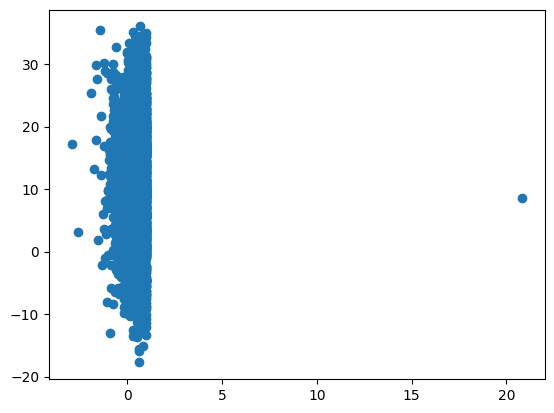

In [ ]:
plt.scatter(dataset['x4'], dataset['y'])

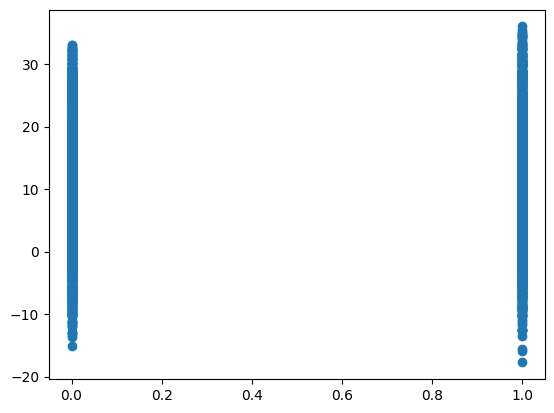

In [ ]:
plt.scatter(dataset['x5'], dataset['y'])

In [ ]:
plt.scatter(dataset['x6'], dataset['y'])

##Aufgabe 3


1.   Erstellen Sie eine Korrelationsmatrix.
2.   Bewerten Sie die Korrelation.



##Aufgabe 4
Erstellen Sie eine multiple lineare Regression mit den Inputwerten. Achten Sie dabei darauf, dass die Variablen aus dem Dummy-Encoding eine multikollineare Abhängigkeit aufweisen, so dass Sie nur zwei der drei Variablen verwenden dürfen.

In [ ]:
import statsmodels.api as sm
data_x = dataset.drop(columns = ['y', 'x6'])
data_y = dataset.y
model = sm.OLS(data_y,data_x)
results = model.fit()
results.summary()

##Aufgabe 5
Wie sind die Ergebnisse zu interpretieren?

##Aufgabe 6
Erstellen Sie zur Lösung des Problems ein dreischichtiges Multi Layer Perceptron.
Verändern Sie die Anzahl der Neuronen (z.B. 10 und 30) der versteckten Schicht und verwenden Sie zwei verschiedene Aktivierungsfunktionen ('sigmoid' und 'relu') und vergleichen Sie die Ergebnisse.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state = 0)
X_train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model.add(Dense(X_train.shape[1]))

#Verstecktes Layer
model.add(Dense(25,activation='sigmoid'))

#Outputlayer mit einem Neuronen
model.add(Dense(1))


model.compile(optimizer=Adam(0.001), loss='mse')

In [ ]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=2000)

In [ ]:
yn_train_pred = model.predict(X_train)
yn_test_pred = model.predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

In [ ]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

##Aufgabe 7
Interpretieren Sie die Ergebnisse der multiplen linearen Regression und der neuronalen Netze im Zusammenhang.